Exploring raw dataset

In [2]:
import pandas as pd

db = pd.read_csv("../data/raw/SalesForCourse_quizz_table.csv")

Reading the headers:

In [3]:
print(db.head(5))

   index      Date    Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016.0  February          29.0               F   
1      1  02/20/16  2016.0  February          29.0               F   
2      2  02/27/16  2016.0  February          29.0               F   
3      3  03/12/16  2016.0     March          29.0               F   
4      4  03/12/16  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50   28.

Reading the info:

In [4]:
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
print(db.describe())

              index          Year  Customer Age      Quantity     Unit Cost  \
count  34867.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17433.000000   2015.569237     36.382895      2.002524    349.880567   
std    10065.380254      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.500000   2015.000000     28.000000      1.000000     45.000000   
50%    17433.000000   2016.000000     35.000000      2.000000    150.000000   
75%    26149.500000   2016.000000     44.000000      3.000000    455.000000   
max    34866.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue      Column1  
count  34866.000000  34866.000000  34867.000000  2574.000000  
mean     389.232485    576.004532    640.870093   688.054913  
std      525.319091    690.500395    736.640033   774.200897  
min        0.666667      2.000000   

Let's see if we can find any missing values.

In [6]:
print(db.isnull().sum())
print(db.isnull().mean() * 100)
# Check for duplicates

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64
index                0.000000
Date                 0.002868
Year                 0.002868
Month                0.002868
Customer Age         0.002868
Customer Gender      0.002868
Country              0.002868
State                0.002868
Product Category     0.002868
Sub Category         0.002868
Quantity             0.002868
Unit Cost            0.002868
Unit Price           0.002868
Cost                 0.002868
Revenue              0.000000
Column1             92.617661
dtype: float64


The column 'Column1' seems to contain many empty cells. All other cols other than index and revenue have just one null entry.

Let's look at all the dataypes present.

In [7]:
db.dtypes

index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
Column1             float64
dtype: object

Seems consistent, with only one type.

Can we find any outliers? Let's take a high level visual look first at age.

<Axes: xlabel='Customer Age'>

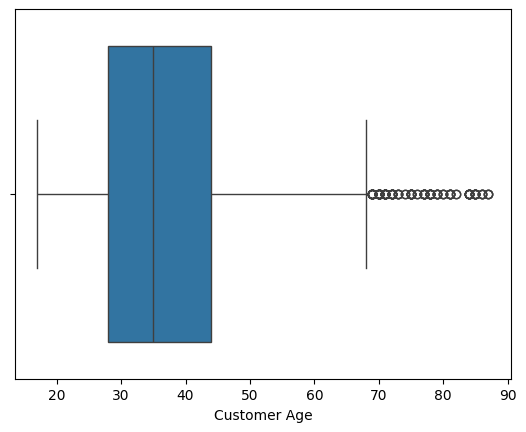

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=db, x='Customer Age')

Let's now look at revenue.

<Axes: xlabel='Revenue'>

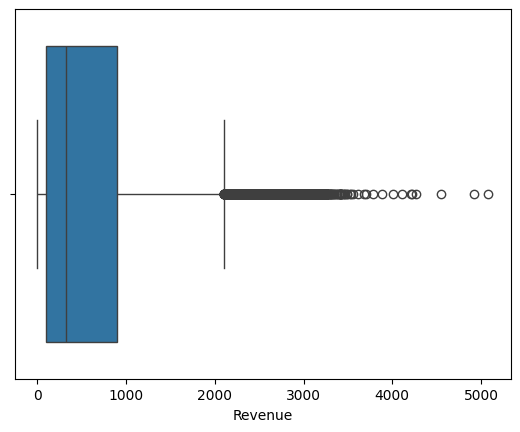

In [9]:
sns.boxplot(data=db, x='Revenue')

In [10]:
Q1 = db['Revenue'].quantile(0.25)
Q3 = db['Revenue'].quantile(0.75)
IQR = Q3 - Q1

outliers = db[(db['Revenue'] < Q1 - 1.5 * IQR) | (db['Revenue'] > Q3 + 1.5 * IQR)]
print("Number of outliers in Revenue:", len(outliers))

Number of outliers in Revenue: 2801


Revenue seems to have many outliers, which makes sense.

Let's take a look at the number of countries present to see if that correlates to real world numbers.

In [11]:
print(db['Country'].nunique())

print(db['Country'].unique())

4
['United States' 'France' 'United Kingdom' 'Germany' nan]


Our data set seems to only include developed nations in NA and EU, which is fine for my needs.